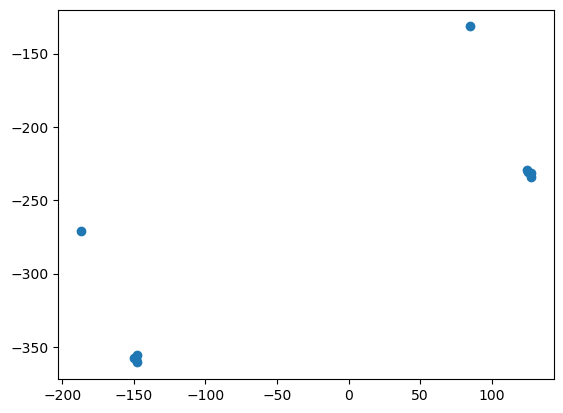

In [1]:
# Task 1
import numpy as np
import matplotlib.pyplot as plt

class Boid:
    def __init__(self, x, y, vx, vy, inner_radius, outer_radius):
        self.position = np.array([x, y])
        self.velocity = np.array([vx, vy])
        self.inner_radius = inner_radius
        self.outer_radius = outer_radius

def separation(boid, nearby_boids):
    """Separation behavior."""
    separation_vector = np.zeros(2)
    for other_boid in nearby_boids:
        distance = np.linalg.norm(boid.position - other_boid.position)
        if 0 < distance < boid.inner_radius:
            separation_vector += (boid.position - other_boid.position) / distance
    return separation_vector

def cohesion(boid, nearby_boids):
    """Cohesion behavior."""
    if not nearby_boids:
        return np.zeros(2)
    center_of_mass = np.mean([other_boid.position for other_boid in nearby_boids], axis=0)
    cohesion_vector = (center_of_mass - boid.position) / np.linalg.norm(center_of_mass - boid.position)
    return cohesion_vector

def alignment(boid, nearby_boids):
    """Alignment behavior."""
    if not nearby_boids:
        return np.zeros(2)
    average_velocity = np.mean([other_boid.velocity for other_boid in nearby_boids], axis=0)
    alignment_vector = (average_velocity - boid.velocity) / np.linalg.norm(average_velocity - boid.velocity)
    return alignment_vector

def update_boid(boid, all_boids):
    """Update boid's position and velocity based on behaviors."""
    separation_vector = separation(boid, all_boids)
    cohesion_vector = cohesion(boid, all_boids)
    alignment_vector = alignment(boid, all_boids)

    # Adjust weights based on your preference
    separation_weight = 1.5
    cohesion_weight = 1.0
    alignment_weight = 1.0

    # Update velocity
    boid.velocity += separation_weight * separation_vector + cohesion_weight * cohesion_vector + alignment_weight * alignment_vector
    # Limit the velocity to a maximum value if needed
    max_velocity = 5.0
    speed = np.linalg.norm(boid.velocity)
    if speed > max_velocity:
        boid.velocity = max_velocity * boid.velocity / speed

    # Update position
    boid.position += boid.velocity

# Example usage:
num_boids = 10
boids = [Boid(np.random.rand()*10, np.random.rand()*10, np.random.rand()*2-1, np.random.rand()*2-1, 2, 5) for _ in range(num_boids)]

# Simulation steps
for _ in range(100):
    for boid in boids:
        nearby_boids = [other_boid for other_boid in boids if np.linalg.norm(boid.position - other_boid.position) < boid.outer_radius and boid != other_boid]
        update_boid(boid, nearby_boids)

# Visualization (scatter plot)
x_values = [boid.position[0] for boid in boids]
y_values = [boid.position[1] for boid in boids]
plt.scatter(x_values, y_values)
plt.show()


In [2]:
# Task 2
import numpy as np
import pandas as pd

class Boid:
    def __init__(self, x, y, vx, vy, inner_radius, outer_radius):
        self.position = np.array([x, y])
        self.velocity = np.array([vx, vy])
        self.inner_radius = inner_radius
        self.outer_radius = outer_radius

def separation(boid, nearby_boids):
    """Separation behavior."""
    separation_vector = np.zeros(2)
    for other_boid in nearby_boids:
        distance = np.linalg.norm(boid.position - other_boid.position)
        if 0 < distance < boid.inner_radius:
            separation_vector += (boid.position - other_boid.position) / distance
    return separation_vector

def cohesion(boid, nearby_boids):
    """Cohesion behavior."""
    if not nearby_boids:
        return np.zeros(2)
    center_of_mass = np.mean([other_boid.position for other_boid in nearby_boids], axis=0)
    cohesion_vector = (center_of_mass - boid.position) / np.linalg.norm(center_of_mass - boid.position)
    return cohesion_vector

def alignment(boid, nearby_boids):
    """Alignment behavior."""
    if not nearby_boids:
        return np.zeros(2)
    average_velocity = np.mean([other_boid.velocity for other_boid in nearby_boids], axis=0)
    alignment_vector = (average_velocity - boid.velocity) / np.linalg.norm(average_velocity - boid.velocity)
    return alignment_vector

def update_boid(boid, all_boids):
    """Update boid's position and velocity based on behaviors."""
    separation_vector = separation(boid, all_boids)
    cohesion_vector = cohesion(boid, all_boids)
    alignment_vector = alignment(boid, all_boids)

    # Adjust weights based on your preference
    separation_weight = 1.5
    cohesion_weight = 1.0
    alignment_weight = 1.0

    # Update velocity
    boid.velocity += separation_weight * separation_vector + cohesion_weight * cohesion_vector + alignment_weight * alignment_vector
    # Limit the velocity to a maximum value if needed
    max_velocity = 5.0
    speed = np.linalg.norm(boid.velocity)
    if speed > max_velocity:
        boid.velocity = max_velocity * boid.velocity / speed

    # Update position
    boid.position += boid.velocity


def save_to_csv(boids, filename):
    data = {"X_Position": [boid.position[0] for boid in boids],
            "Y_Position": [boid.position[1] for boid in boids],
            "X_Velocity": [boid.velocity[0] for boid in boids],
            "Y_Velocity": [boid.velocity[1] for boid in boids]}
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def run_simulation(num_boids, num_steps, filename):
    # Using Uniform Distribution For Seeding
    boids = [Boid(np.random.rand()*10, np.random.rand()*10, np.random.rand()*2-1, np.random.rand()*2-1, 2, 5) for _ in range(num_boids)]

    positions = []
    velocities = []

    for step in range(num_steps):
        current_positions = [(boid.position[0], boid.position[1]) for boid in boids]
        current_velocities = [(boid.velocity[0], boid.velocity[1]) for boid in boids]

        positions.append(current_positions)
        velocities.append(current_velocities)

        for boid in boids:
            nearby_boids = [other_boid for other_boid in boids if np.linalg.norm(boid.position - other_boid.position) < boid.outer_radius and boid != other_boid]
            update_boid(boid, nearby_boids)

    save_to_csv(boids, filename)

# Run simulations
run_simulation(10, 200, "simulation_10_boids.csv")
run_simulation(100, 200, "simulation_100_boids.csv")

In [3]:
# Task 3
import itertools

class Boid:
    def __init__(self, x, y, vx, vy, inner_radius, outer_radius):
        self.position = np.array([x, y])
        self.velocity = np.array([vx, vy])
        self.inner_radius = inner_radius
        self.outer_radius = outer_radius

def separation(boid, nearby_boids):
    """Separation behavior."""
    separation_vector = np.zeros(2)
    for other_boid in nearby_boids:
        distance = np.linalg.norm(boid.position - other_boid.position)
        if 0 < distance < boid.inner_radius:
            separation_vector += (boid.position - other_boid.position) / distance
    return separation_vector

def cohesion(boid, nearby_boids):
    """Cohesion behavior."""
    if not nearby_boids:
        return np.zeros(2)
    center_of_mass = np.mean([other_boid.position for other_boid in nearby_boids], axis=0)
    cohesion_vector = (center_of_mass - boid.position) / np.linalg.norm(center_of_mass - boid.position)
    return cohesion_vector

def alignment(boid, nearby_boids):
    """Alignment behavior."""
    if not nearby_boids:
        return np.zeros(2)
    average_velocity = np.mean([other_boid.velocity for other_boid in nearby_boids], axis=0)
    alignment_vector = (average_velocity - boid.velocity) / np.linalg.norm(average_velocity - boid.velocity)
    return alignment_vector

def update_boid(boid, all_boids):
    """Update boid's position and velocity based on behaviors."""
    separation_vector = separation(boid, all_boids)
    cohesion_vector = cohesion(boid, all_boids)
    alignment_vector = alignment(boid, all_boids)

    # Adjust weights based on your preference
    separation_weight = 1.5
    cohesion_weight = 1.0
    alignment_weight = 1.0

    # Update velocity
    boid.velocity += separation_weight * separation_vector + cohesion_weight * cohesion_vector + alignment_weight * alignment_vector
    # Limit the velocity to a maximum value if needed
    max_velocity = 5.0
    speed = np.linalg.norm(boid.velocity)
    if speed > max_velocity:
        boid.velocity = max_velocity * boid.velocity / speed

    # Update position
    boid.position += boid.velocity


def save_to_csv(boids, filename):
    data = {"X_Position": [boid.position[0] for boid in boids],
            "Y_Position": [boid.position[1] for boid in boids],
            "X_Velocity": [boid.velocity[0] for boid in boids],
            "Y_Velocity": [boid.velocity[1] for boid in boids]}
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def run_simulation_with_behaviors(behaviors, num_steps, filename):
    boids = [Boid(np.random.rand()*10, np.random.rand()*10, np.random.rand()*2-1, np.random.rand()*2-1, 2, 5) for _ in range(100)]

    positions = []
    velocities = []

    for step in range(num_steps):
        current_positions = [(boid.position[0], boid.position[1]) for boid in boids]
        current_velocities = [(boid.velocity[0], boid.velocity[1]) for boid in boids]

        positions.append(current_positions)
        velocities.append(current_velocities)

        for boid in boids:
            nearby_boids = [other_boid for other_boid in boids if np.linalg.norm(boid.position - other_boid.position) < boid.outer_radius and boid != other_boid]

            if "Separation" in behaviors and "Cohesion" in behaviors:
                update_boid(boid, nearby_boids)
            elif "Separation" in behaviors and "Alignment" in behaviors:
                update_boid(boid, nearby_boids)
            elif "Cohesion" in behaviors and "Alignment" in behaviors:
                update_boid(boid, nearby_boids)

    save_to_csv(boids, filename)

# Run simulations for each combination of behaviors
combinations = ["Separation&Cohesion", "Separation&Alignment", "Cohesion&Alignment"]

for combination in combinations:
    behaviors = combination.split("&")
    run_simulation_with_behaviors(behaviors, 200, f"simulation_{combination}_100_boids.csv")

In [4]:
# Task 4
# Modification 1: Introducing Obstacles

class Obstacle:
    def __init__(self, x, y, radius):
        self.position = np.array([x, y])
        self.radius = radius

def avoid_obstacles(boid, obstacles):
    """Avoidance behavior for obstacles."""
    avoidance_vector = np.zeros(2)
    for obstacle in obstacles:
        distance = np.linalg.norm(boid.position - obstacle.position)
        if distance < boid.outer_radius + obstacle.radius:
            avoidance_vector += (boid.position - obstacle.position) / distance
    return avoidance_vector

def update_boid_with_obstacles(boid, all_boids, obstacles):
    """Update boid's position and velocity with obstacle avoidance."""
    separation_vector = separation(boid, all_boids)
    cohesion_vector = cohesion(boid, all_boids)
    alignment_vector = alignment(boid, all_boids)
    avoidance_vector = avoid_obstacles(boid, obstacles)

    # Adjust weights based on your preference
    separation_weight = 1.5
    cohesion_weight = 1.0
    alignment_weight = 1.0
    avoidance_weight = 2.0

    # Update velocity
    boid.velocity += (separation_weight * separation_vector +
                      cohesion_weight * cohesion_vector +
                      alignment_weight * alignment_vector +
                      avoidance_weight * avoidance_vector)

    # Limit the velocity to a maximum value if needed
    max_velocity = 5.0
    speed = np.linalg.norm(boid.velocity)
    if speed > max_velocity:
        boid.velocity = max_velocity * boid.velocity / speed

    # Update position
    boid.position += boid.velocity


In [5]:
# Modification 2: Random Perturbations

def introduce_perturbations(boid, perturbation_scale=0.1):
    """Introduce random perturbations to boid's velocity."""
    perturbation = perturbation_scale * np.random.rand(2)
    return perturbation

def update_boid_with_perturbations(boid):
    """Update boid's position and velocity with random perturbations."""
    perturbation = introduce_perturbations(boid)
    boid.velocity += perturbation

    # Limit the velocity to a maximum value if needed
    max_velocity = 5.0
    speed = np.linalg.norm(boid.velocity)
    if speed > max_velocity:
        boid.velocity = max_velocity * boid.velocity / speed

    # Update position
    boid.position += boid.velocity


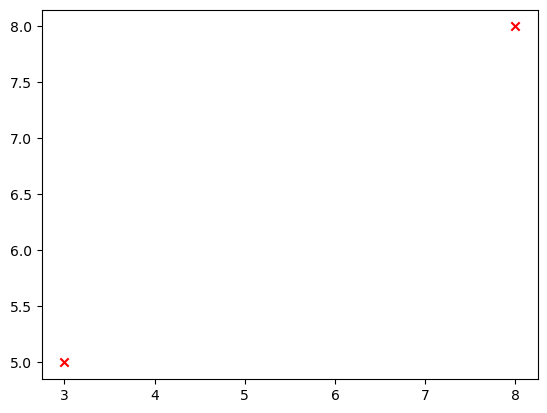

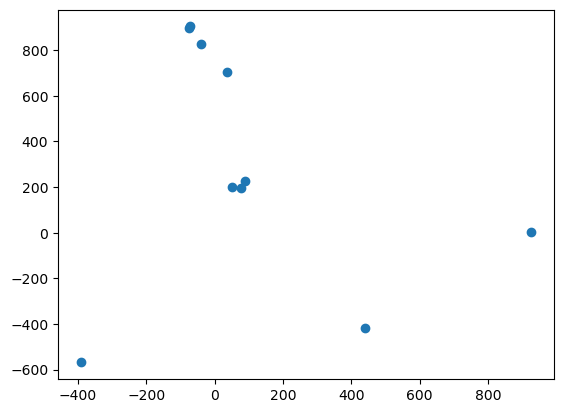

In [6]:
# Simulation Runs

# Simulation with Obstacles
obstacles = [Obstacle(3, 5, 1), Obstacle(8, 8, 1)]
for obstacle in obstacles:
    plt.scatter(obstacle.position[0], obstacle.position[1], color='red', marker='x')

for _ in range(200):
    for boid in boids:
        nearby_boids = [other_boid for other_boid in boids if np.linalg.norm(boid.position - other_boid.position) < boid.outer_radius and boid != other_boid]
        update_boid_with_obstacles(boid, nearby_boids, obstacles)

save_to_csv(boids, "simulation_with_obstacles.csv")
plt.show()

# Simulation with Perturbations
for _ in range(200):
    for boid in boids:
        update_boid_with_perturbations(boid)

save_to_csv(boids, "simulation_with_perturbations.csv")
plt.scatter([boid.position[0] for boid in boids], [boid.position[1] for boid in boids])
plt.show()
